<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Feature%20Engineering/Exercise_10_Image_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ICE-10. Image Transforms
Please download the input image from the following link:<br>
https://drive.google.com/file/d/11WCiKcdtXhbhaOnS4Y1VZfZgSQG9zWVo/view?usp=share_link <br><br>

###**Tutorial Fast Fourier Transform**

Step 1: Compute the 2-dimensional Fast Fourier Transform.

Step 2: Shift the zero-frequency component to the center of the spectrum.

Step 3: Inverse of Step 2. Shift the zero-frequency component back to original location

Step 4: Inverse of Step 1. Compute the 2-dimensional inverse Fast Fourier Transform.


In [ ]:
!gdown '1ojsfTXOPvHQHVCr6n-o9O1Gjn6tS9c4Q'

Downloading...
From: https://drive.google.com/uc?id=1ojsfTXOPvHQHVCr6n-o9O1Gjn6tS9c4Q
To: /content/001.jpg
100% 71.5k/71.5k [00:00<00:00, 95.8MB/s]


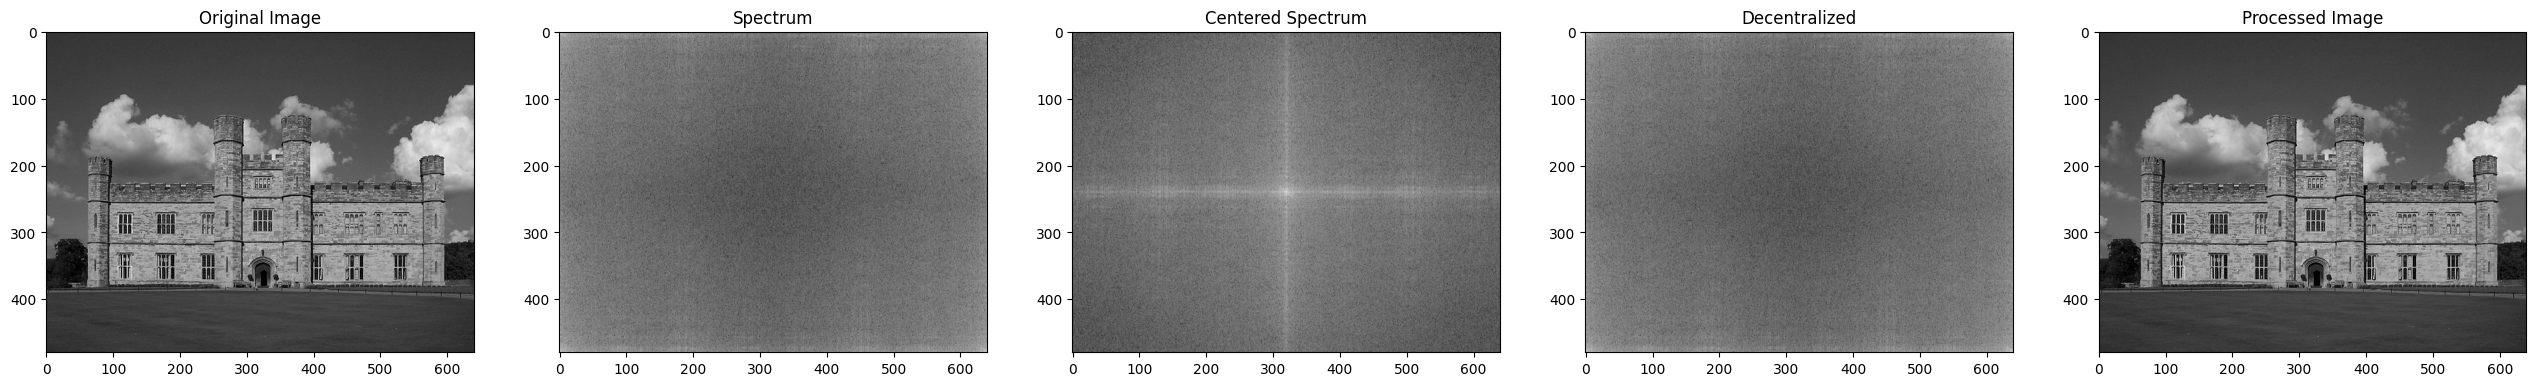

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base


# Question 1

### What is Fourier Transform ?
### What is Fast Fourier Transform ?
### What is difference between Fast Fourier Transform and Fourier Transform ?
### Which is better FT or FFT ? If so why ?

## Answer Here

## Task 1

### By using above function please plot these filters with proper labels

- Ideal low Pass Filter
- Ideal High Pass Filter

In [ ]:
#code here

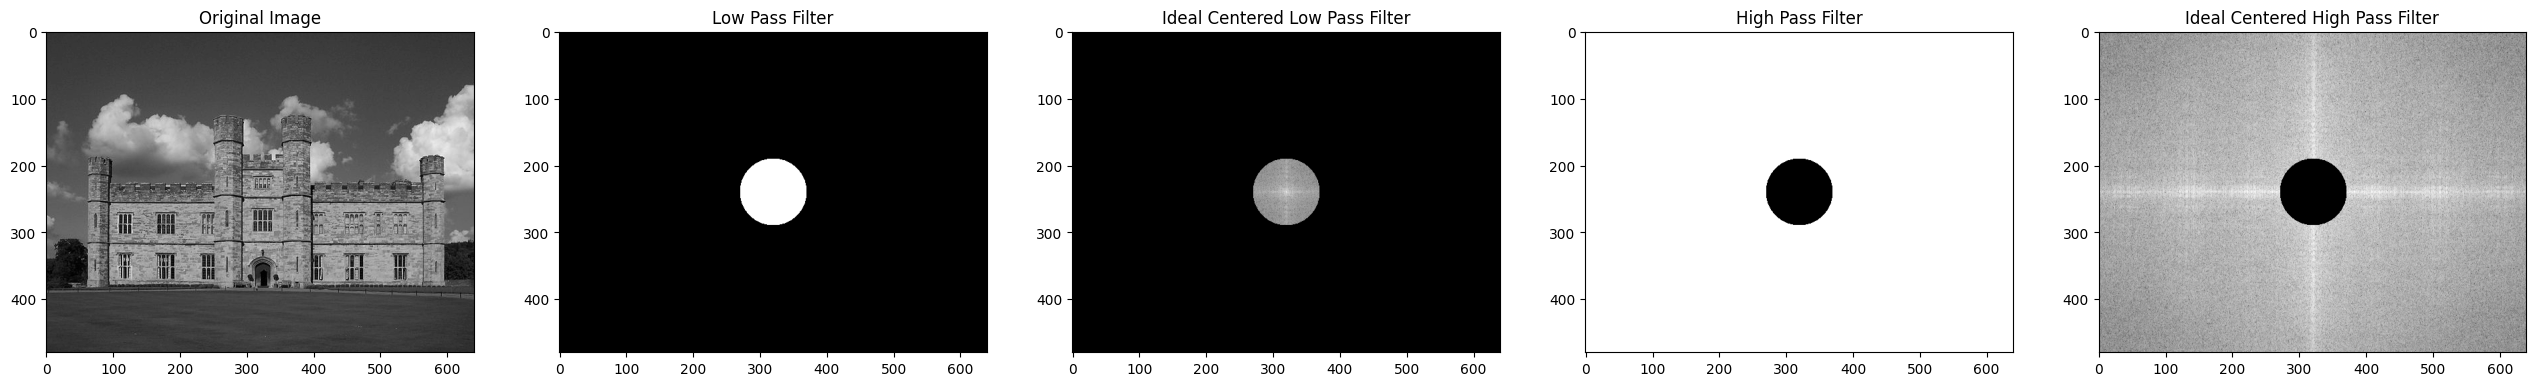

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")


# image in frequency domain
img_freqD = np.fft.fft2(img)
img_Fshift = np.fft.fftshift(img_freqD)

# low pass filtering
img_lp = idealFilterLP(50, img.shape)
plt.subplot(152), plt.imshow(np.abs(img_lp), "gray"), plt.title("Low Pass Filter")

# Ideal Low Pass Filtering
img_Gshift = img_Fshift * img_lp
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_Gshift)), "gray"), plt.title("Ideal Centered Low Pass Filter")

# high pass filtering
img_hp = idealFilterHP(50, img.shape)
plt.subplot(154), plt.imshow(np.abs(img_hp), "gray"), plt.title("High Pass Filter")

# Ideal High Pass Filtering
img_hp_Gshift = img_Fshift * img_hp
plt.subplot(155), plt.imshow(np.log(1+np.abs(img_hp_Gshift)), "gray"), plt.title("Ideal Centered High Pass Filter")

plt.show()



## Task 2

### Just like above function of ideal filter , Write functions for the following filters

- Butterworth low Pass Filter
- Butterworth High Pass Filter
- Gaussian low pass Filter
- Gaussian High pass Filter

In [ ]:
# code it here

In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def butterworthFilterLP(D0,imgShape,n):
    M,N = imgShape
    H = np.zeros((M,N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = 1 / (1 + (D/D0)**n)

    return H


def butterworthFilterHP(D0,imgShape,n):
    M,N = imgShape
    HPF = np.zeros((M,N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          HPF[u,v] = 1 / (1 + (D0/D)**n)

    return HPF


def gaussianFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y,x),center)
            base[y,x] = np.exp(-dist**2/(2*D0*D0))
    return base


def gaussianFilterHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y,x),center)
            base[y,x] = np.exp(-dist**2/(2*D0*D0))
    return 1-base

Reference:

https://github.com/adenarayana/digital-image-processing/blob/main/Python%23008%20Butterworth%20Filter.py

## Task 3

### By using task 2 functions please plot these filters with proper labels

- Butterworth low Pass Filter for n = 5
- Butterworth High Pass Filter for n = 5
- Butterworth low Pass Filter for n = 20
- Butterworth High Pass Filter for n = 20
- Gaussian Low Pass Filter
- Gaussian High Pass Filter


In [ ]:
# code here

<ipython-input-7-60f29f111143>:21: RuntimeWarning: divide by zero encountered in double_scalars
  HPF[u,v] = 1 / (1 + (D0/D)**n)


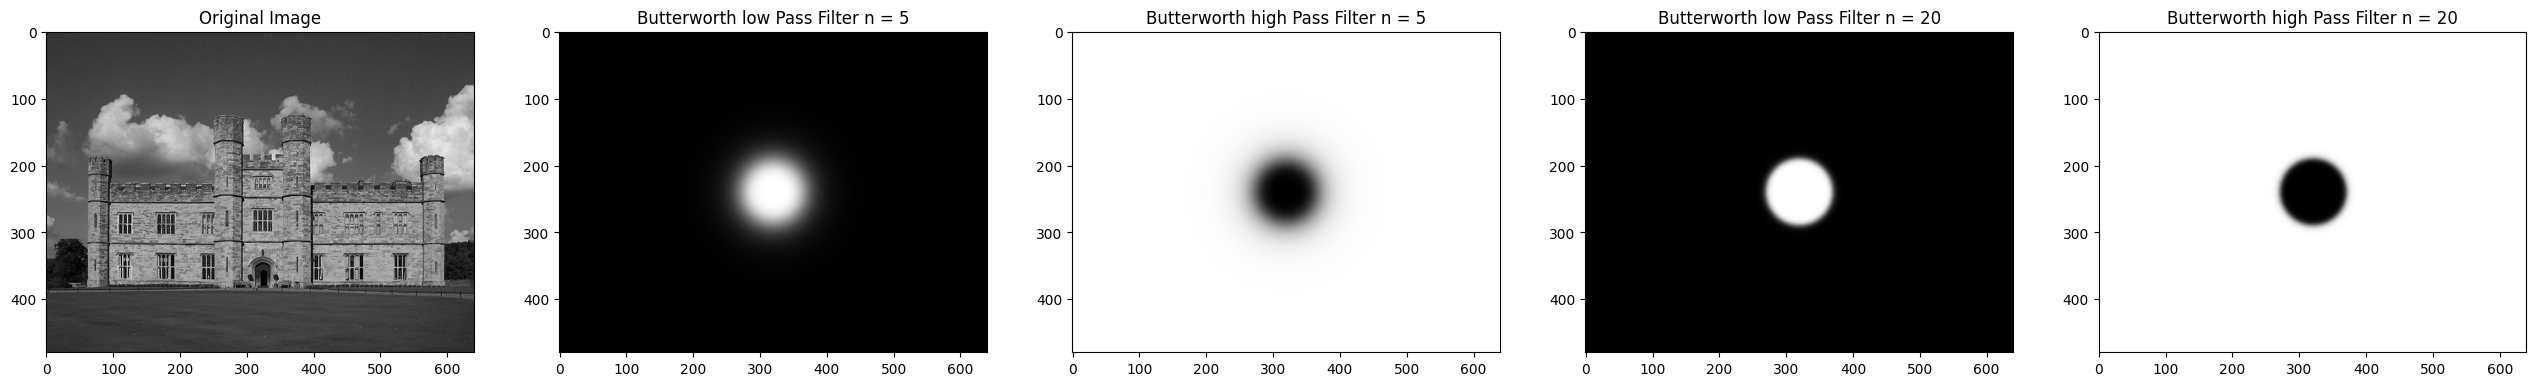

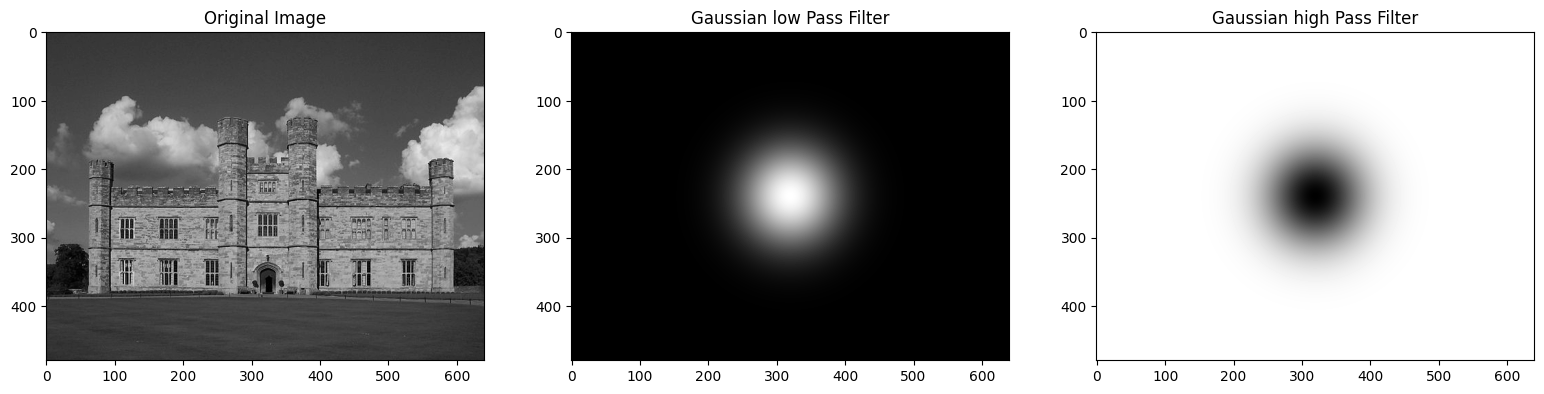

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")


# image in frequency domain
img_freqD = np.fft.fft2(img)
img_Fshift = np.fft.fftshift(img_freqD)

# butterworth low pass filtering n=5
img_Blp1 = butterworthFilterLP(50, img.shape, 5)
plt.subplot(152), plt.imshow(np.abs(img_Blp1), "gray"), plt.title("Butterworth low Pass Filter n = 5")

# butterworth high pass filtering with n=5
img_Bhp1 = butterworthFilterHP(50, img.shape, 5)
plt.subplot(153), plt.imshow(np.abs(img_Bhp1), "gray"), plt.title("Butterworth high Pass Filter n = 5")

# butterworth low pass filtering n=20
img_Blp2 = butterworthFilterLP(50, img.shape, 20)
plt.subplot(154), plt.imshow(np.abs(img_Blp2), "gray"), plt.title("Butterworth low Pass Filter n = 20")

# butterworth high pass filtering with n=20
img_Bhp2 = butterworthFilterHP(50, img.shape, 20)
plt.subplot(155), plt.imshow(np.abs(img_Bhp2), "gray"), plt.title("Butterworth high Pass Filter n = 20")

plt.show()


############
print("========================================================================================================================")

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")


# gaussian low pass filtering
img_BGlp1 = gaussianFilterLP(50, img.shape)
plt.subplot(132), plt.imshow(np.abs(img_BGlp1), "gray"), plt.title("Gaussian low Pass Filter")

# gaissian high pass filtering (#img_Ghp1 = 1-img_BGlp1)
img_Ghp1 = gaussianFilterHP(50, img.shape)
plt.subplot(133), plt.imshow(np.abs(img_Ghp1), "gray"), plt.title("Gaussian high Pass Filter")

plt.show()

# Question 2

### What is Low pass Filter ?
### Applications of low pass filter ?
### What is high pass Filter ?
### Applications of high pass filter ?

## Answer Here

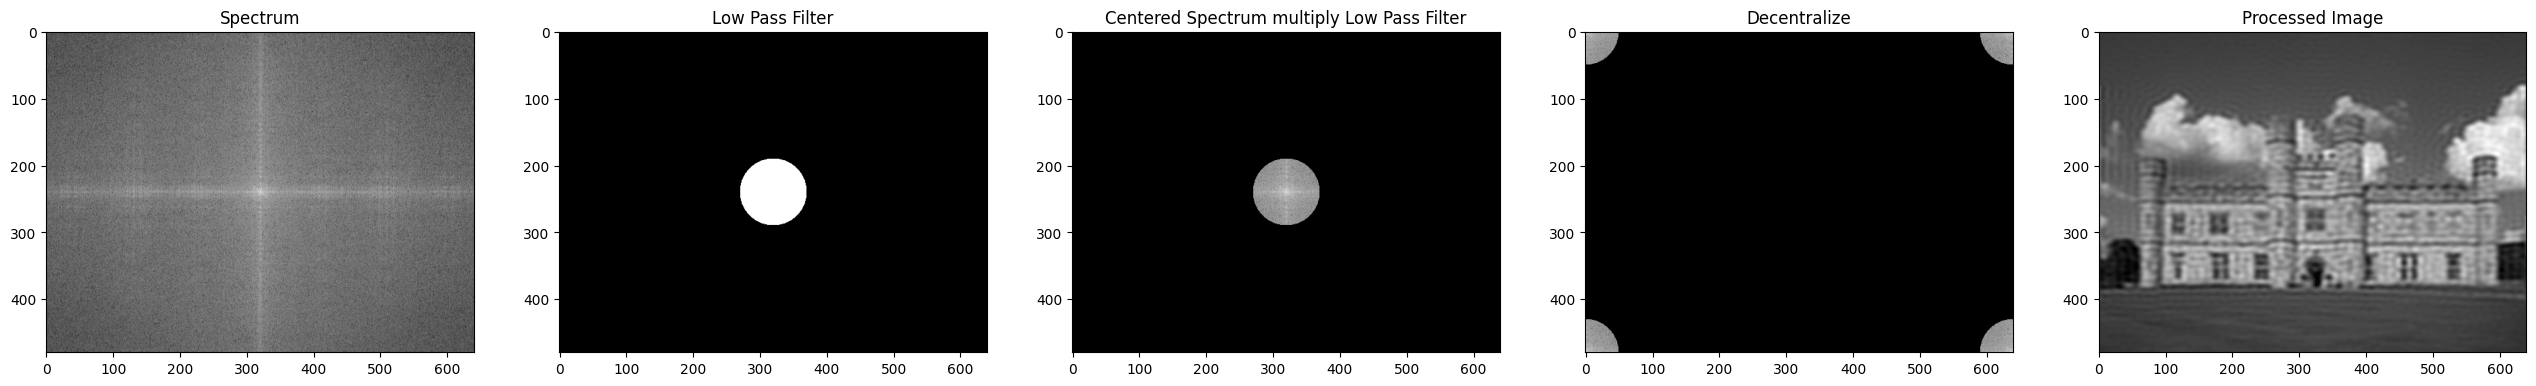

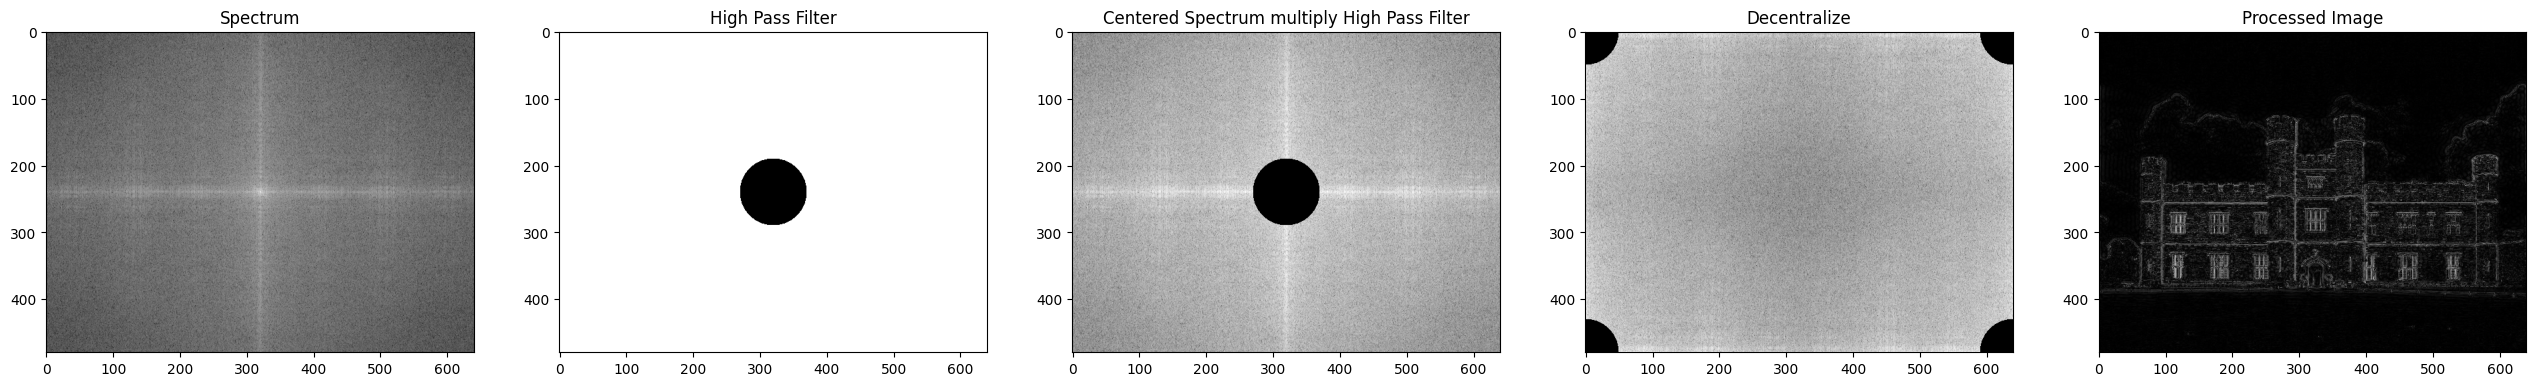

In [ ]:
# Tutorial
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()
############
print("========================================================================================================================")
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()



# **Question 3**


## In the task above what is the characteristics of low pass and high pass filter ?

- Explain how the behavoiur change from left image to right image in both the filters
- conclude what each kind of filter does here

## Answer here

## Task 4

### By using task 2 functions write code for High pass centered filters and plot these filters with proper labels

- Ideal High Pass
- Butterworth High Pass (n=15)
- Gaussian High Pass

In [ ]:
# code it here

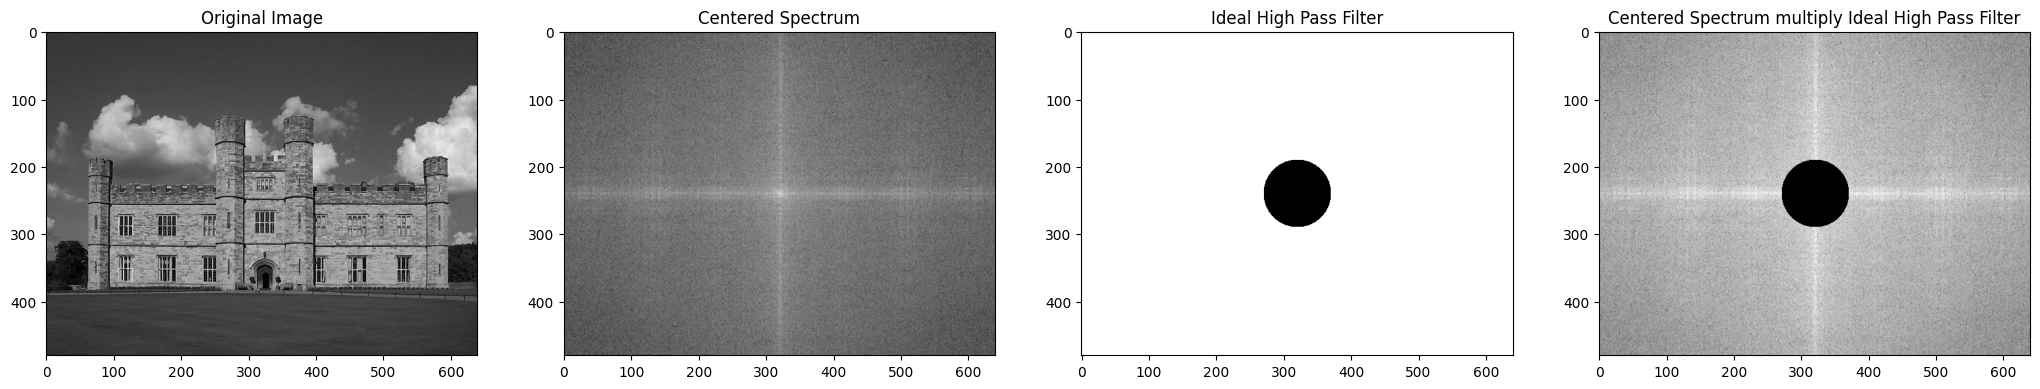

<ipython-input-7-60f29f111143>:21: RuntimeWarning: divide by zero encountered in double_scalars
  HPF[u,v] = 1 / (1 + (D0/D)**n)


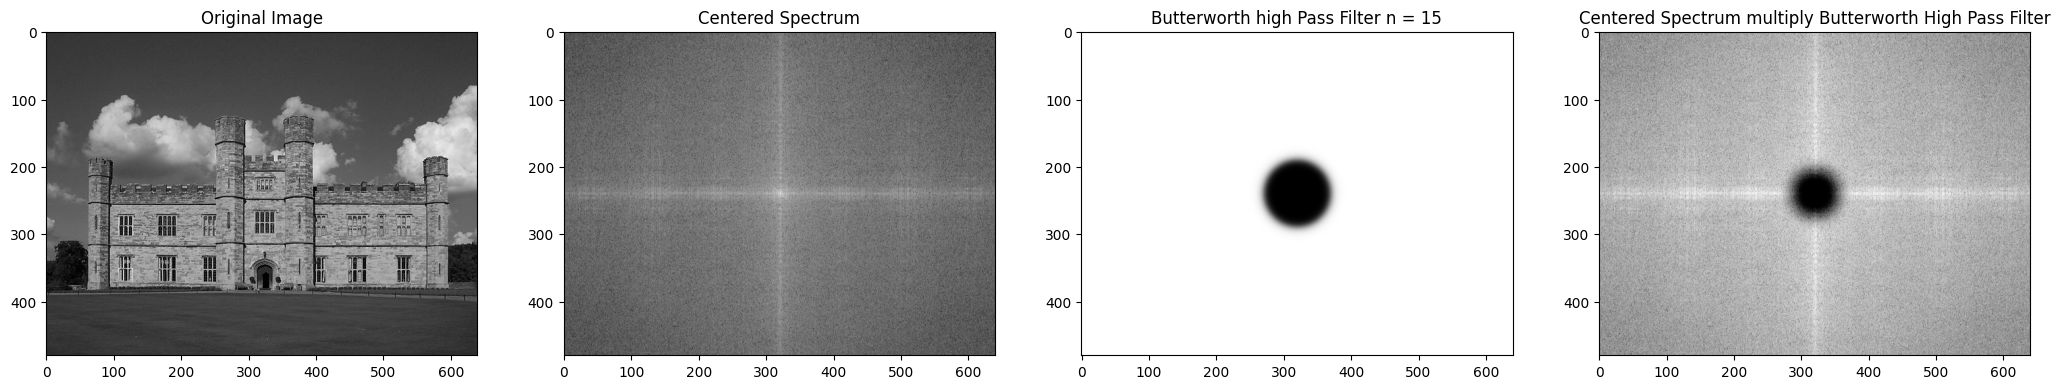

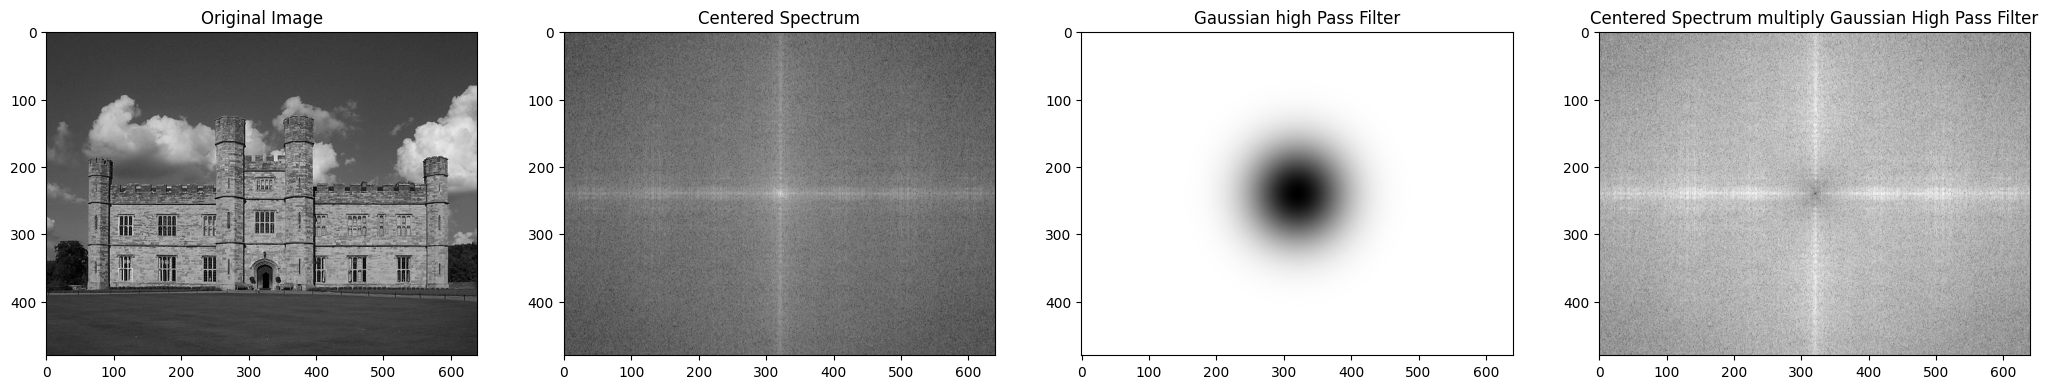

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Ideal High Pass
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)

plt.subplot(141), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(142), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(143), plt.imshow(np.abs(HighPass), "gray"), plt.title("Ideal High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(144), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply Ideal High Pass Filter")

plt.show()

############
print("========================================================================================================================")


# Butterworth High Pass
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)

plt.subplot(141), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(142), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")


# butterworth high pass filtering with n=15
img_Bhp = butterworthFilterHP(50, img.shape, 15)
plt.subplot(143), plt.imshow(np.abs(img_Bhp), "gray"), plt.title("Butterworth high Pass Filter n = 15")

BHighPassCenter = center * butterworthFilterHP(50, img.shape, 15)
plt.subplot(144), plt.imshow(np.log(1+np.abs(BHighPassCenter)), "gray"), plt.title("Centered Spectrum multiply Butterworth High Pass Filter")

plt.show()


############
print("========================================================================================================================")


# Gaussian High Pass
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)

plt.subplot(141), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(142), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")


# Gaussian high pass filtering
img_Ghp1 = gaussianFilterHP(50, img.shape)
plt.subplot(143), plt.imshow(np.abs(img_Ghp1), "gray"), plt.title("Gaussian high Pass Filter")

GHighPassCenter = center * gaussianFilterHP(50, img.shape)
plt.subplot(144), plt.imshow(np.log(1+np.abs(GHighPassCenter)), "gray"), plt.title("Centered Spectrum multiply Gaussian High Pass Filter")

plt.show()

# Question 4

### Which has more smooth image , Gaussian filter or Butterworth ?
### Ideal filter , Butterworth filter and Gaussian filter. Distortion is high in which filter among these ?

##Answer here

##Testing Area

In [ ]:
def butterworthFilterLP_Old(D0,imgShape,N):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
          dist = distance((y,x),center)
          base[y,x] = 1 / (1 + (dist/D0)**N)

    return base

def butterworthFilterHP_Old(D0,imgShape,N):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
          dist = distance((y,x),center)
          base[y,x] = 1 / (1 + (D0/dist)**N)
    return base

In [ ]:
'''
# Ideal Low Pass Filtering
img_Gshift = img_Fshift * img_lp
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_Gshift)), "gray"), plt.title("Ideal Low Pass Filter")

# high pass filtering
img_hp = idealFilterHP(50, img.shape)
plt.subplot(154), plt.imshow(np.abs(img_hp), "gray"), plt.title("High Pass Filter")

# Ideal High Pass Filtering
img_hp_Gshift = img_Fshift * img_hp
plt.subplot(155), plt.imshow(np.log(1+np.abs(img_hp_Gshift)), "gray"), plt.title("Ideal High Pass Filter")

plt.show()

'''

'\n# Ideal Low Pass Filtering\nimg_Gshift = img_Fshift * img_lp\nplt.subplot(153), plt.imshow(np.log(1+np.abs(img_Gshift)), "gray"), plt.title("Ideal Low Pass Filter")\n\n# high pass filtering\nimg_hp = idealFilterHP(50, img.shape)\nplt.subplot(154), plt.imshow(np.abs(img_hp), "gray"), plt.title("High Pass Filter")\n\n# Ideal High Pass Filtering\nimg_hp_Gshift = img_Fshift * img_hp\nplt.subplot(155), plt.imshow(np.log(1+np.abs(img_hp_Gshift)), "gray"), plt.title("Ideal High Pass Filter")\n\nplt.show()\n\n'